Из методички Коротеева

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import sklearn as sklearn

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
type(california)

sklearn.utils.Bunch

In [4]:
sklearn.utils.Bunch

sklearn.utils.Bunch

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [8]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [11]:
y = data['Price']
X = data.drop('Price', axis=1)

In [12]:
y.shape, X.shape

((20640,), (20640, 8))

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [15]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.43669329313432437
HouseAge 0.009435778033238269
AveRooms -0.10732204139090384
AveBedrms 0.6450656935198117
Population -3.976389421239332e-06
AveOccup -0.003786542654971036
Latitude -0.42131437752714357
Longitude -0.43451375467477704


In [16]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718435


In [17]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [18]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


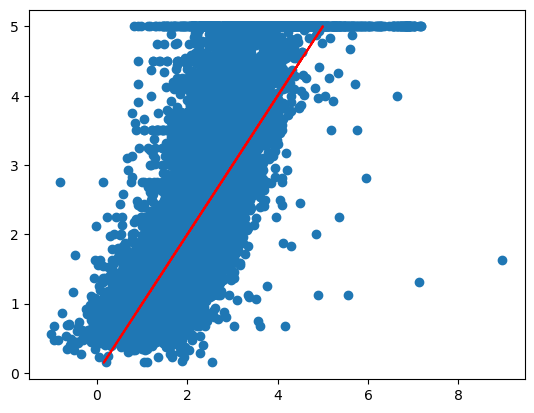

In [19]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [20]:
model.score(X, y)

0.606232685199805

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [22]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

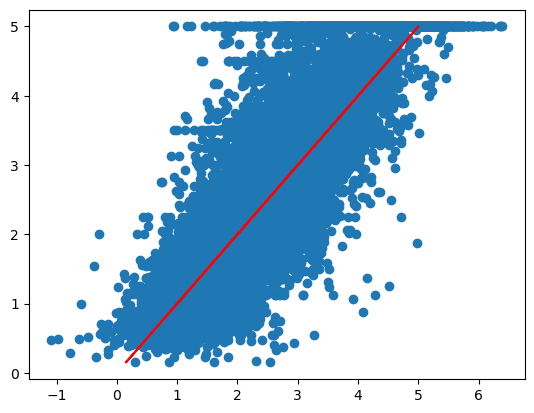

In [23]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [24]:
polynomial.score(poly, y)

0.7441672091713025

# Задания для самостоятельного выполнения

1.	Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
2.	Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

     i.	Метод опорных векторов:

                a.	Без ядра

                b.	С гауссовым ядром

                c.	С полиномиальным ядром
        
    ii.	Метод ближайших соседей
    
    iii.	Многослойный перцептрон
    
    iv.	Дерево решений
    
    v.	(*) Другие методы:
    
                a.	Гребневую регрессию

                b.	Регрессию Лассо

                c.	Регрессию ElasticNet

                d.	Случайный лес

                e.	Беггинг

                f.	Другие модели по желанию
        
3.	Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

4.	Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.


1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_diabetes

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
mean_squared_error(model.predict(X), y)

0.5243209861846072

In [28]:
mean_absolute_error(model.predict(X), y)

0.5311643817546463

In [29]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели с измененными аргументами
model = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=-1)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление коэффициента детерминации (R^2) на тестовой выборке
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)


R^2: 0.5196561679229004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

i. Метод опорных векторов:

      a.    Без ядра

      b.    С гауссовым ядром

      c.    С полиномиальным ядром
ii. Метод ближайших соседей

iii. Многослойный перцептрон

iv. Дерево решений

v. (*) Другие методы:

      a.    Гребневую регрессию

      b.    Регрессию Лассо

      c.    Регрессию ElasticNet

      d.    Случайный лес

      e.    Беггинг

      f.    Другие модели по желанию
3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [31]:
models = []
models.append(SVR())
models.append(SVR(kernel="rbf"))
models.append(SVR(kernel="poly"))
models.append(KNeighborsRegressor(n_neighbors=5))
models.append(MLPRegressor())
models.append(DecisionTreeRegressor(criterion='absolute_error'))
models.append(Ridge())
models.append(Lasso())
models.append(ElasticNet())
models.append(RandomForestRegressor())
models.append(BaggingRegressor())

In [32]:
def auto_learning(models, X_train, X_test, y_train, y_test):
    dict_1 = {}
    dict_1["Metrix"] = ["MSE", "MAE", "MAPE"]
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(model)
        print("MSE: ", mean_squared_error(y_test, y_pred))
        print("MAE: ", mean_absolute_error(y_test, y_pred))
        print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
        plt.scatter(y_pred, y_test)
        plt.plot(y, y, c='r')
        plt.show()
        name = str(model)
        dict_1[name[:20]] = [mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)]
        print()
    print(pd.DataFrame(dict_1))

SVR()
MSE:  1.3320115421348737
MAE:  0.8599506583445752
MAPE: 0.5227832033451757


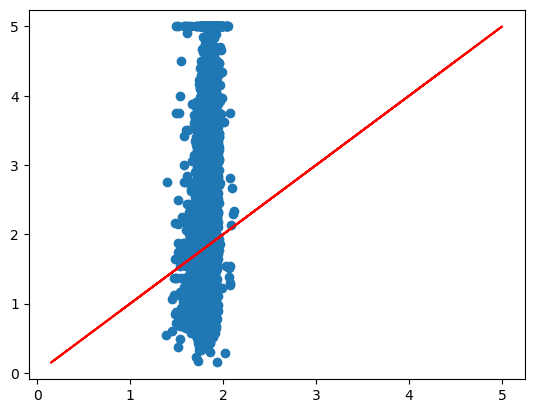


SVR()
MSE:  1.3320115421348737
MAE:  0.8599506583445752
MAPE: 0.5227832033451757


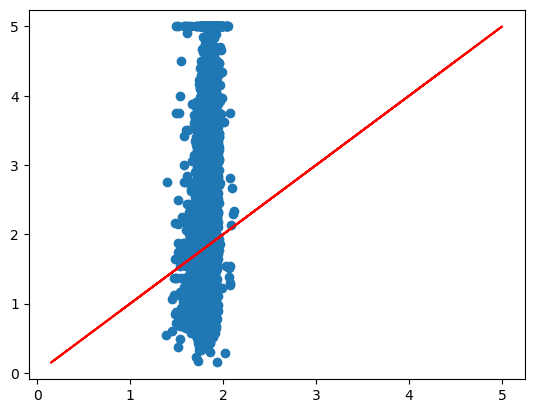


SVR(kernel='poly')
MSE:  1.3485494562094407
MAE:  0.8631846179513958
MAPE: 0.5239818347747656


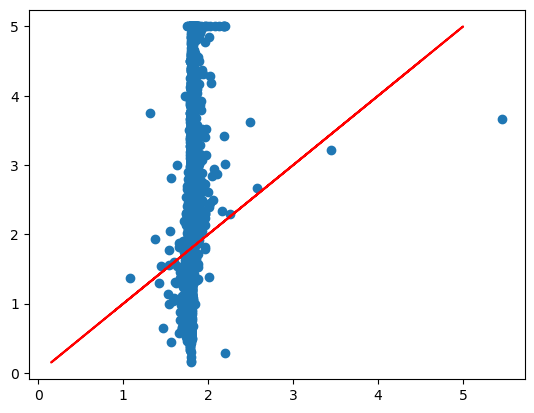


KNeighborsRegressor()
MSE:  1.1186823858768293
MAE:  0.8127975600775195
MAPE: 0.5344887935787594


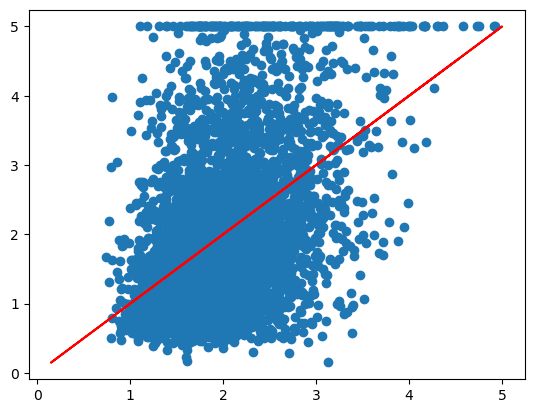


MLPRegressor()
MSE:  0.6007503234210023
MAE:  0.5461619500901936
MAPE: 0.327716043308437


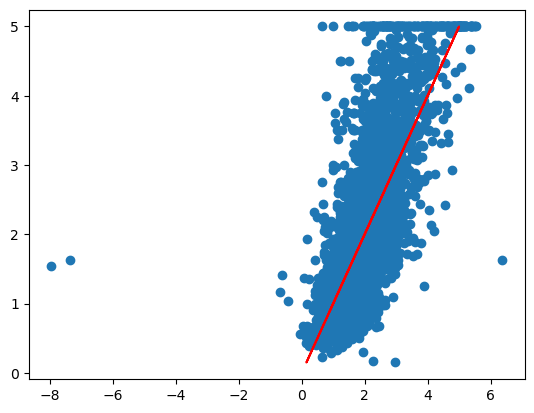


DecisionTreeRegressor(criterion='absolute_error')
MSE:  0.5356452574368701
MAE:  0.4766436385658915
MAPE: 0.2704900122836214


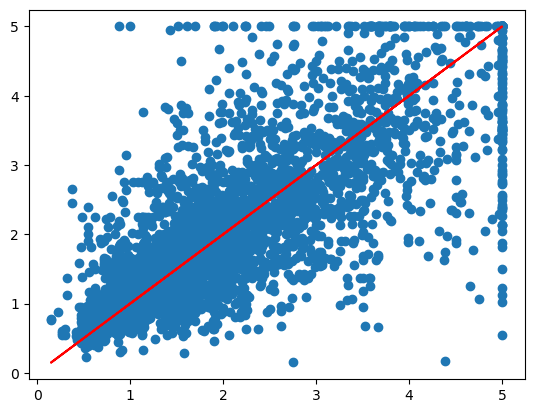


Ridge()
MSE:  0.5558034669932208
MAE:  0.5332039182571167
MAPE: 0.31952347060588276


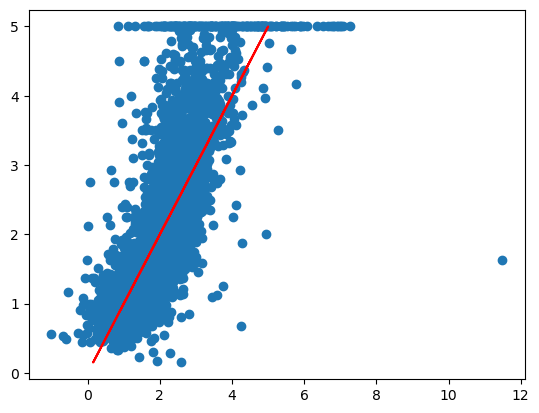


Lasso()
MSE:  0.9380337514945428
MAE:  0.7615782541669575
MAPE: 0.5243863484667893


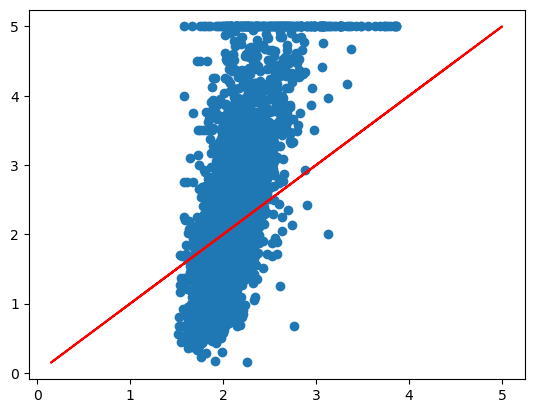


ElasticNet()
MSE:  0.7645556403971131
MAE:  0.6762835861380528
MAPE: 0.4577249581761797


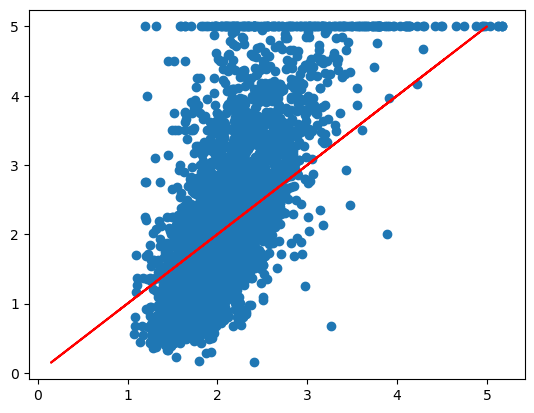


RandomForestRegressor()
MSE:  0.2568239030902175
MAE:  0.329723270276163
MAPE: 0.190258062373857


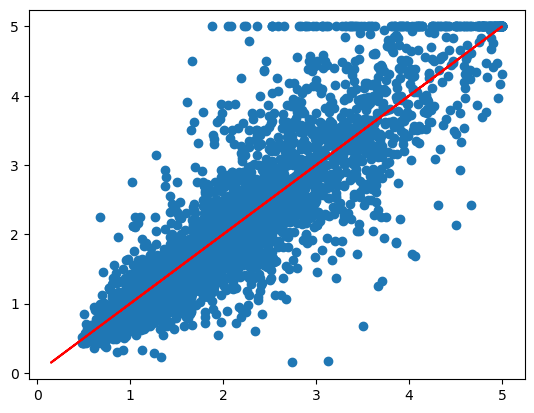


BaggingRegressor()
MSE:  0.2721835409984694
MAE:  0.34153370687984497
MAPE: 0.19578481355743882


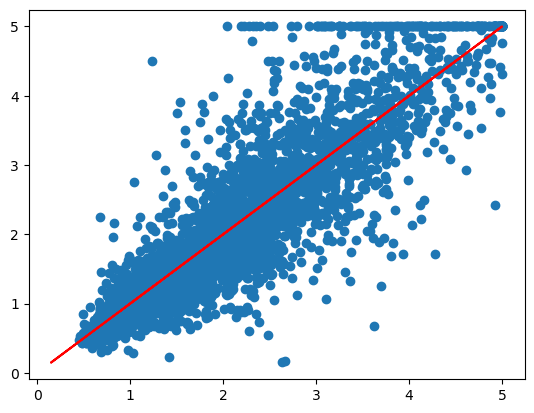


  Metrix     SVR()  SVR(kernel='poly')  KNeighborsRegressor(  MLPRegressor()  \
0    MSE  1.332012            1.348549              1.118682        0.600750   
1    MAE  0.859951            0.863185              0.812798        0.546162   
2   MAPE  0.522783            0.523982              0.534489        0.327716   

   DecisionTreeRegresso   Ridge()   Lasso()  ElasticNet()  \
0              0.535645  0.555803  0.938034      0.764556   
1              0.476644  0.533204  0.761578      0.676284   
2              0.270490  0.319523  0.524386      0.457725   

   RandomForestRegresso  BaggingRegressor()  
0              0.256824            0.272184  
1              0.329723            0.341534  
2              0.190258            0.195785  


In [33]:
auto_learning(models, X_train, X_test, y_train, y_test)

Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [34]:
diabets = load_diabetes()

In [35]:
data = pd.DataFrame(diabets.data, columns = diabets.feature_names)
data['Diabet'] = diabets.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabet
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [36]:
y = data['Diabet']
X = data.drop('Diabet', axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVR()
MSE:  4333.281139599468
MAE:  56.02374097221004
MAPE: 0.49028597568817095


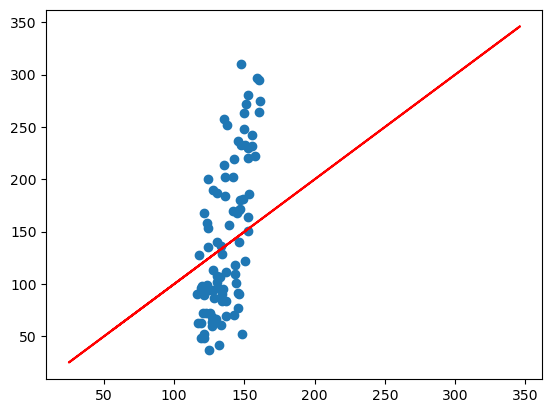


SVR()
MSE:  4333.281139599468
MAE:  56.02374097221004
MAPE: 0.49028597568817095


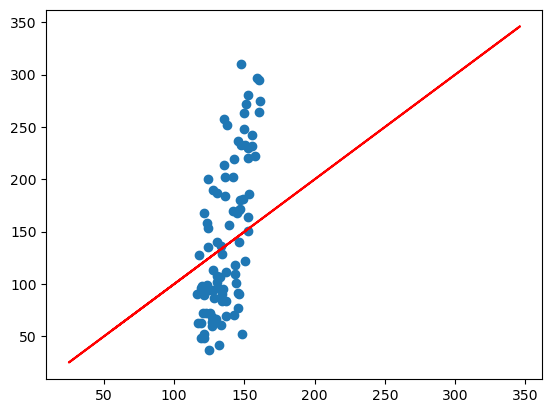


SVR(kernel='poly')
MSE:  3803.024722774551
MAE:  51.661561191789495
MAPE: 0.4420425701111427


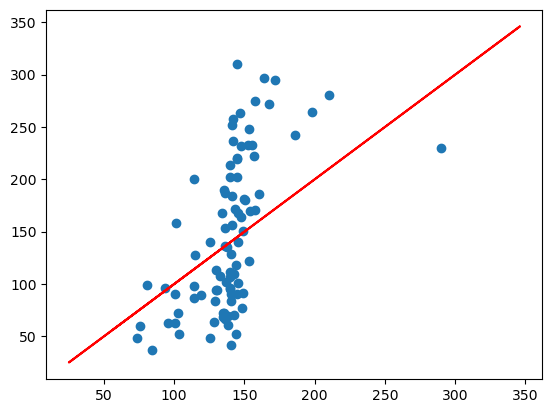


KNeighborsRegressor()
MSE:  3019.075505617978
MAE:  42.77078651685394
MAPE: 0.3635969317758066


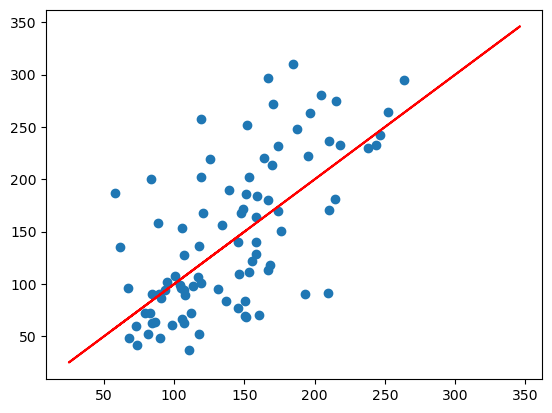


MLPRegressor()
MSE:  21602.988258155943
MAE:  128.86205049969308
MAPE: 0.856335156548288


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


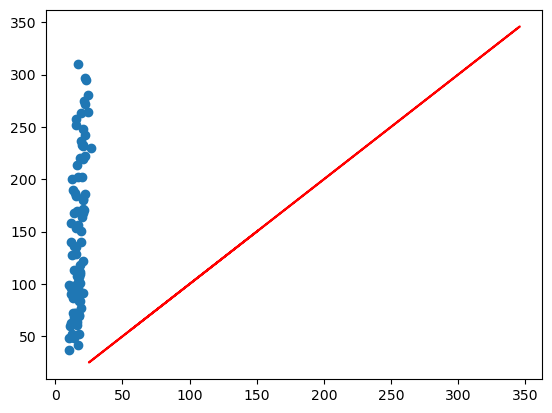


DecisionTreeRegressor(criterion='absolute_error')
MSE:  7511.561797752809
MAE:  67.8314606741573
MAPE: 0.59176347511924


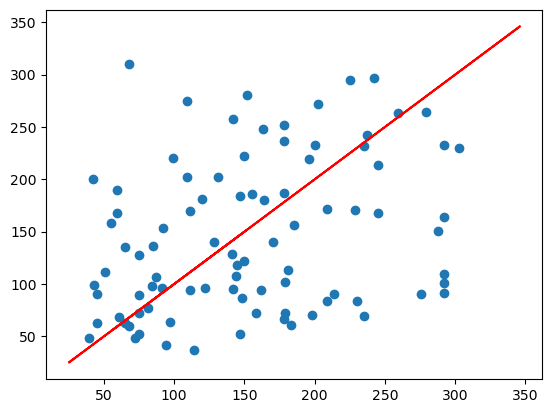


Ridge()
MSE:  3077.4142782200897
MAE:  46.138820117877565
MAPE: 0.425693013953262


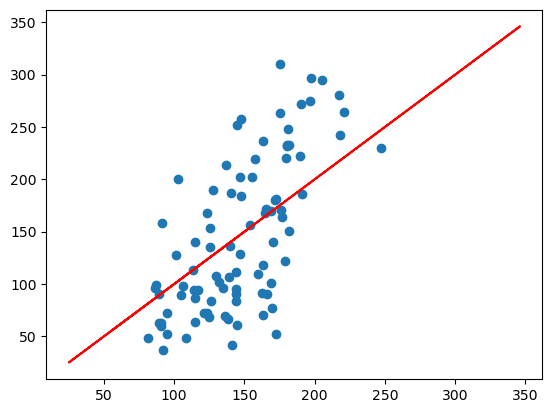


Lasso()
MSE:  3403.5701919165826
MAE:  49.73023281231025
MAPE: 0.47112495390199083


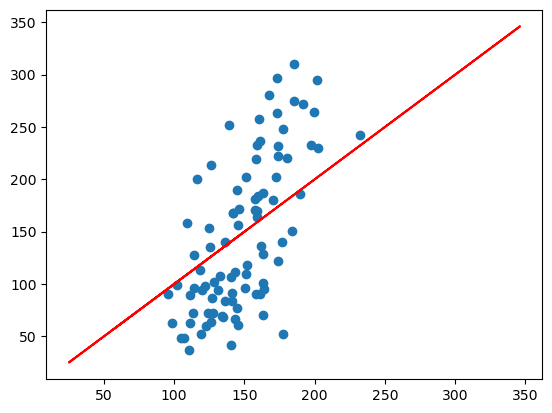


ElasticNet()
MSE:  5311.212718027376
MAE:  63.705900275026224
MAPE: 0.6247482121126889


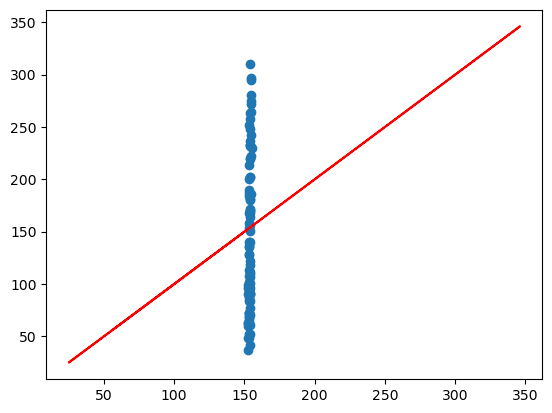


RandomForestRegressor()
MSE:  3012.306294382022
MAE:  44.52943820224719
MAPE: 0.40113819519714705


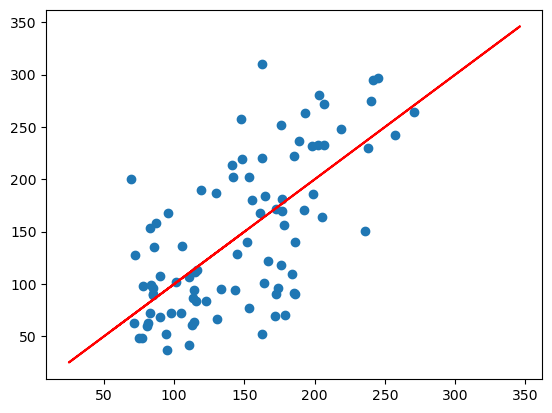


BaggingRegressor()
MSE:  2936.619101123595
MAE:  44.071910112359554
MAPE: 0.3956459902546861


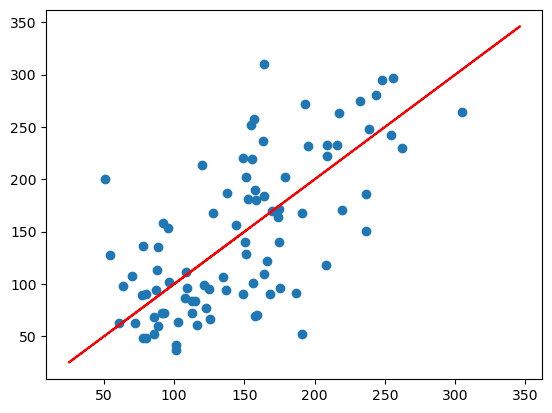


  Metrix        SVR()  SVR(kernel='poly')  KNeighborsRegressor(  \
0    MSE  4333.281140         3803.024723           3019.075506   
1    MAE    56.023741           51.661561             42.770787   
2   MAPE     0.490286            0.442043              0.363597   

   MLPRegressor()  DecisionTreeRegresso      Ridge()      Lasso()  \
0    21602.988258           7511.561798  3077.414278  3403.570192   
1      128.862050             67.831461    46.138820    49.730233   
2        0.856335              0.591763     0.425693     0.471125   

   ElasticNet()  RandomForestRegresso  BaggingRegressor()  
0   5311.212718           3012.306294         2936.619101  
1     63.705900             44.529438           44.071910  
2      0.624748              0.401138            0.395646  


In [38]:
auto_learning(models, X_train, X_test, y_train, y_test)